<a href="https://colab.research.google.com/github/tugcegurbuz/MiCM_Fall22_Machine-Learning-Principles/blob/main/0_Introduction_to_Google_Colab_Basics_and_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Google Colab Basics and Pytorch

By [Tugce Gurbuz ](https://www.tugcegurbuz.com)as a part of [MiCM-2022](https://www.mcgill.ca/micm/) Machine Learning Principles workshop

**Reference:** Adapted from [Neuromatch Academy - Deep Learning Summer School](https://deeplearning.neuromatch.io/tutorials/intro.html) - [W1D1 materials](https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/chapter_title.html)


<p align='center'><img src='https://github.com/tugcegurbuz/MiCM2022_Introduction-to-ML/blob/main/miscellaneous/micm_logo.jpg?raw=True'/></p>

---
# Tutorial Objectives

We have a few specific objectives for this tutorial:
* Learn about Google Colab and Python
* Learn about PyTorch and tensors
* Tensor Manipulations
* Data Loading
* GPUs and Cuda Tensors

---
# Setup

Throughout your tutorials, most (probably all!) notebooks contain setup cells. These cells will import the required Python packages (e.g., PyTorch, NumPy); set global or environment variables, and load in helper functions for things like plotting. In some tutorials, you will notice that we install some dependencies even if they are preinstalled on Google Colab.

Be sure to run all of the cells in the setup section. Feel free to expand them and have a look at what you are loading in, but you should be able to fulfill the learning objectives of every tutorial without having to look at these cells.

If you start building your own projects built on this code base we highly recommend looking at them in more detail.

In [ ]:
# @title Install dependencies
!pip install pandas --quiet

In [ ]:
# Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [ ]:
# @title Figure Settings
import ipywidgets as widgets
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")

---
# Section 1: The Basics of PyTorch

PyTorch is a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for[ NumPy](https://en.wikipedia.org/wiki/NumPy) optimized for the power of GPUs
-  A deep learning platform that provides significant flexibility
   and speed

At its core, PyTorch provides a few key features:

- A multidimensional [Tensor](https://pytorch.org/docs/stable/tensors.html) (i.e., matrix that can have any number of dimensions, see picture below)  object, similar to [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) but with GPU acceleration.
- An optimized **"autograd"** engine for automatically computing derivatives.
- A clean, modular API for building and deploying **deep learning models**.

You can find more information about PyTorch in the Appendix.

<p align='center'><img src='https://1.bp.blogspot.com/-blhiPPxWFlg/YNYW-eIAQnI/AAAAAAAAAkw/ChH22RlfxuY4EaNXb3w7X8kvW0xcvsNxgCPcBGAYYCw/w640-h252/pytorchvs%2Btensorflow.PNG?raw=True'/></p>


<p align='center'><img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.gq-qHnpwhiReloHgqP6sdQHaCl%26pid%3DApi&f=1&ipt=7377e95f32b965fffe9b489e94000d9e347082885c1b9535c05d2608f37bafed&ipo=images?raw=True'/></p>

## Section 1.1: Creating Tensors


There are various ways of creating tensors, and when doing any real deep learning project, we will usually have to do so.

**Construct tensors directly:**

---



In [ ]:
# We can construct a tensor directly from some common python iterables,
# such as list and tuple nested iterables can also be handled as long as the
# dimensions are compatible

# tensor from a list
a = torch.tensor([0, 1, 2])

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


**Some common tensor constructors:**

---

In [ ]:
# The numerical arguments we pass to these constructors
# determine the shape of the output tensor

x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[2.4756e-35, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan]]])


Notice that `.empty()` does not return zeros, but seemingly random numbers. Unlike `.zeros()`, which initialises the elements of the tensor with zeros, `.empty()` just allocates the memory. It is hence a bit faster if you are looking to just create a tensor.

**Creating random tensors and tensors like other tensors:**

---

In [ ]:
# There are also constructors for random numbers

# Uniform distribution
a = torch.rand(1, 3)

# Normal distribution
b = torch.randn(3, 4)

# There are also constructors that allow us to construct
# a tensor according to the above constructors, but with
# dimensions equal to another tensor.

c = torch.zeros_like(a)
d = torch.rand_like(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor a: tensor([[0.6737, 0.5525, 0.2423]])
Tensor b: tensor([[-1.3518, -0.1104,  0.4682, -1.1658],
        [ 0.5407, -0.0062, -0.4396, -2.2128],
        [-0.4836, -0.5542, -1.9901, -0.7529]])
Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.3093, 0.3179, 0.4772]])


*Reproducibility*:

- PyTorch Random Number Generator (RNG): You can use `torch.manual_seed()` to seed the RNG for all devices (both CPU and GPU):

```python
import torch
torch.manual_seed(0)
```
- For custom operators, you might need to set python seed as well:

```python
import random
random.seed(0)
```

- Random number generators in other libraries (e.g., NumPy):

```python
import numpy as np
np.random.seed(0)
```

Here, we define for you a function called `set_seed` that does the job for you!

In [ ]:
def set_seed(seed=None, seed_torch=True):
  """
  Function that controls randomness. NumPy and random modules must be imported.

  Args:
    seed : Integer
      A non-negative integer that defines the random state. Default is `None`.
    seed_torch : Boolean
      If `True` sets the random seed for pytorch tensors, so pytorch module
      must be imported. Default is `True`.

  Returns:
    Nothing.
  """
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)
  if seed_torch:
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

  print(f'Random seed {seed} has been set.')

Now, let's use the `set_seed` function in the previous example. Execute the cell multiple times to verify that the numbers printed are always the same.

In [ ]:
def simplefun(seed=True, my_seed=None):
  """
  Helper function to verify effectiveness of set_seed attribute

  Args:
    seed: Boolean
      Specifies if seed value is provided or not
    my_seed: Integer
      Initializes seed to specified value

  Returns:
    Nothing
  """
  if seed:
    set_seed(seed=my_seed)

  # uniform distribution
  a = torch.rand(1, 3)
  # normal distribution
  b = torch.randn(3, 4)

  print("Tensor a: ", a)
  print("Tensor b: ", b)

In [ ]:
simplefun(seed=True, my_seed=42)  # Turn `seed` to `False` or change `my_seed`

Random seed 42 has been set.
Tensor a:  tensor([[0.8823, 0.9150, 0.3829]])
Tensor b:  tensor([[-0.8293, -1.6137, -0.2147,  0.2989],
        [-0.0107, -1.2492, -1.2284,  0.5294],
        [ 1.2211,  0.1511, -0.3319, -0.4785]])


**Numpy-like number ranges:**
---
The ```.arange()``` and ```.linspace()``` behave how you would expect them to if you are familar with numpy.

In [ ]:
a = torch.arange(0, 10, step=1)
b = np.arange(0, 10, step=1)

c = torch.linspace(0, 5, steps=11)
d = np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Numpy array b: {b}\n")
print(f"Tensor c: {c}\n")
print(f"Numpy array d: {d}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numpy array b: [0 1 2 3 4 5 6 7 8 9]

Tensor c: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])

Numpy array d: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]



### Coding Exercise 1.1: Creating Tensors

Below you will find some incomplete code. Fill in the missing code to construct the specified tensors.

We want the tensors:

$A:$ 20 by 21 tensor consisting of ones

$B:$ a tensor with elements equal to the elements of numpy array $Z$

$C:$ a tensor with the same number of elements as $A$ but with values $
\sim \mathcal{U}(0,1)^\dagger$

$D:$ a 1D tensor containing the even numbers between 4 and 40 inclusive.

<br>

$^\dagger$: $\mathcal{U(\alpha, \beta)}$ denotes the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) from $\alpha$ to $\beta$, with $\alpha, \beta \in \mathbb{R}$.


In [ ]:
def tensor_creation(Z):
  """
  A function that creates various tensors.

  Args:
    Z: numpy.ndarray
      An array of shape (3,4)

  Returns:
    A : Tensor
      20 by 21 tensor consisting of ones
    B : Tensor
      A tensor with elements equal to the elements of numpy array Z
    C : Tensor
      A tensor with the same number of elements as A but with values ∼U(0,1)
    D : Tensor
      A 1D tensor containing the even numbers between 4 and 40 inclusive.
  """
  #################################################
  ## TODO for students: fill in the missing code
  ## from the first expression
  #raise NotImplementedError("Student exercise: say what they should have done")
  #################################################
  A = torch.ones(20, 21)
  B = torch.tensor(Z)
  C = torch.rand_like(A)
  D = torch.arange(4, 41, step=2)

  return A, B, C, D



# numpy array to copy later
Z = np.vander([1, 2, 3], 4)

# Uncomment below to check your function!
A, B, C, D = tensor_creation(Z)

In [ ]:
#@markdown Click for solution
def tensor_creation(Z):
  """
  A function that creates various tensors.
  Args:
    Z: numpy.ndarray
      An array of shape (3,4)
  Returns:
    A : Tensor
      20 by 21 tensor consisting of ones
    B : Tensor
      A tensor with elements equal to the elements of numpy array  Z
    C : Tensor
      A tensor with the same number of elements as A but with values ∼U(0,1)
    D : Tensor
      A 1D tensor containing the even numbers between 4 and 40 inclusive.
  """

  A = torch.ones(20, 21)
  B = torch.tensor(Z)
  C = torch.rand_like(A)
  D = torch.arange(4, 41, step=2)

  return A, B, C, D

# numpy array to copy later
Z = np.vander([1, 2, 3], 4)

# Uncomment below to check your function!
A, B, C, D = tensor_creation(Z)


## Section 1.2: Operations in PyTorch

**Tensor-Tensor operations**

We can perform operations on tensors using methods under `torch.`

**Tensor-Tensor operations**

We can perform operations on tensors using methods under `torch.`.

In [ ]:
a = torch.ones(5, 3)
b = torch.rand(5, 3)
c = torch.empty(5, 3)
d = torch.empty(5, 3)

# this only works if c and d already exist
torch.add(a, b, out=c)

# Pointwise Multiplication of a and b
torch.multiply(a, b, out=d)

print(c)
print(d)

tensor([[1.6511, 1.5313, 1.0794],
        [1.4481, 1.9796, 1.6273],
        [1.5428, 1.3962, 1.3256],
        [1.7980, 1.5308, 1.8253],
        [1.4115, 1.7185, 1.7064]])
tensor([[0.6511, 0.5313, 0.0794],
        [0.4481, 0.9796, 0.6273],
        [0.5428, 0.3962, 0.3256],
        [0.7980, 0.5308, 0.8253],
        [0.4115, 0.7185, 0.7064]])


**By default, everything is pointwise:** However, in PyTorch, most common Python operators are overridden.
The common standard arithmetic operators ($+$, $-$, $*$, $/$, and $**$) have all been lifted to elementwise operations

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
x + y, x - y, x * y, x / y, x**y  # The `**` is the exponentiation operator

(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

**Tensor Methods**

Tensors also have a number of common arithmetic operations built in. A full list of **all** methods can be found  in the appendix (there are a lot!)

All of these operations should have similar syntax to their numpy equivalents.

In [ ]:
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")
print("\n")

print(f"Mean value of all elements of x {x.mean()}")
print(f"Mean values of the columns of x {x.mean(axis=0)}")
print(f"Mean values of the rows of x {x.mean(axis=1)}")

tensor([[0.5797, 0.8142, 0.8133],
        [0.9635, 0.8844, 0.3722],
        [0.0767, 0.5914, 0.4956]])


Sum of every element of x: 5.590977191925049
Sum of the columns of x: tensor([1.6199, 2.2900, 1.6811])
Sum of the rows of x: tensor([2.2072, 2.2200, 1.1637])


Mean value of all elements of x 0.6212196946144104
Mean values of the columns of x tensor([0.5400, 0.7633, 0.5604])
Mean values of the rows of x tensor([0.7357, 0.7400, 0.3879])


**Matrix Operations**

The `@` symbol is overridden to represent matrix multiplication. You can also use `torch.matmul()` to multiply tensors. For dot multiplication, you can use `torch.dot()`.

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.



### Coding Exercise 1.2 : Simple tensor operations



In [ ]:
def simple_operations(a1: torch.Tensor, a2: torch.Tensor, a3: torch.Tensor):
  """
  Helper function to demonstrate simple operations
  i.e., Multiplication of tensor a1 with tensor a2 and then add it with tensor a3

  Args:
    a1: Torch tensor
      Tensor of size ([2,2])
    a2: Torch tensor
      Tensor of size ([2,2])
    a3: Torch tensor
      Tensor of size ([2,2])

  Returns:
    answer: Torch tensor
      Tensor of size ([2,2]) resulting from a1 multiplied with a2, added with a3
  """
  ################################################
  ## TODO for students:  complete the first computation using the argument matricies
  #raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  ################################################
  #
  answer = a1 @ a2 + a3
  return answer


# Computing expression 1:

# init our tensors
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
## uncomment to test your function
A = simple_operations(a1, a2, a3)
print(A)

tensor([[20, 24],
        [31, 27]])


In [ ]:
#@markdown Click for solution
def simple_operations(a1: torch.Tensor, a2: torch.Tensor, a3: torch.Tensor):
  """
  Helper function to demonstrate simple operations
  i.e., Multiplication of tensor a1 with tensor a2 and then add it with tensor a3

  Args:
    a1: Torch tensor
      Tensor of size ([2,2])
    a2: Torch tensor
      Tensor of size ([2,2])
    a3: Torch tensor
      Tensor of size ([2,2])

  Returns:
    answer: Torch tensor
      Tensor of size ([2,2]) resulting from a1 multiplied with a2, added with a3
  """
  ################################################
  ## TODO for students:  complete the first computation using the argument matricies
  #raise NotImplementedError("Student exercise: fill in the missing code to complete the operation")
  ################################################
  #
  answer = a1 @ a2 + a3
  return answer


# Computing expression 1:

# init our tensors
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])

## uncomment to test your function
A = simple_operations(a1, a2, a3)
print(A)


tensor([[20, 24],
        [31, 27]])


## Section 1.3 Manipulating Tensors in Pytorch

**Indexing**

Just as in numpy, elements in a tensor can be accessed by index. As in any numpy array, the first element has index 0 and ranges are specified to include the first to last_element-1. We can access elements according to their relative position to the end of the list by using negative indices. Indexing is also referred to as slicing.

For example, `[-1]` selects the last element; `[1:3]` selects the second and the third elements, and `[:-2]` will select all elements excluding the last and second-to-last elements.

In [ ]:
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3])
print(x[:-2])
print(x[-2:])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])
tensor([8, 9])


When we have multidimensional tensors, indexing rules work the same way as NumPy.

In [ ]:
# make a 5D tensor
x = torch.rand(1, 2, 3, 4, 5)

print(f" shape of x[0]:{x[0].shape}")
print(f" shape of x[0][0]:{x[0][0].shape}")
print(f" shape of x[0][0][0]:{x[0][0][0].shape}")

 shape of x[0]:torch.Size([2, 3, 4, 5])
 shape of x[0][0]:torch.Size([3, 4, 5])
 shape of x[0][0][0]:torch.Size([4, 5])


**Flatten and reshape**

There are various methods for reshaping tensors. It is common to have to express 2D data in 1D format. Similarly, it is also common to have to reshape a 1D tensor into a 2D tensor. We can achieve this with the `.flatten()` and `.reshape()` methods.

In [ ]:
z = torch.arange(12).reshape(6, 2)
print(f"Original z: \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(2,2,3) #or .view() can be used
print(f"Reshaped (3x4) z: \n {z}")

Original z: 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])


**Squeezing tensors**

When processing batches of data, you will quite often be left with singleton dimensions. E.g., `[1,10]` or `[256, 1, 3]`. This dimension can quite easily mess up your matrix operations if you don't plan on it being there...

In order to compress tensors along their singleton dimensions we can use the `.squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [ ]:
x = torch.randn(1, 10)
# printing the zeroth element of the tensor will not give us the first number!

print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([1, 10])
x[0]: tensor([ 0.0286, -0.3456,  0.2043,  0.7787,  0.2050,  1.1141, -0.9958,  0.1980,
        -0.7615, -1.0760])


Because of that pesky singleton dimension, `x[0]` gave us the first row instead!

In [ ]:
# Let's get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: 0.028576035052537918


In [ ]:
# Adding singleton dimensions works a similar way, and is often used when tensors
# being added need same number of dimensions

y = torch.randn(5, 5)
print(f"Shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1)
print(f"Shape of y: {y.shape}")

Shape of y: torch.Size([5, 5])
Shape of y: torch.Size([5, 1, 5])


**Permutation**

Sometimes our dimensions will be in the wrong order! For example, we may be dealing with RGB images with dim $[3\times48\times64]$, but our pipeline expects the colour dimension to be the last dimension, i.e., $[48\times64\times3]$. To get around this we can use the `.permute()` method.

In [ ]:
# `x` has dimensions [color,image_height,image_width]
x = torch.rand(3, 48, 64)

# We want to permute our tensor to be [ image_height , image_width , color ]
x = x.permute(1, 2, 0)
# permute(1,2,0) means:
# The 0th dim of my new tensor = the 1st dim of my old tensor
# The 1st dim of my new tensor = the 2nd
# The 2nd dim of my new tensor = the 0th
print(x.shape)

torch.Size([48, 64, 3])


You may also see `.transpose()` used. This works in a similar way as permute, but can only swap two dimensions at once.

**Concatenation**

In this example, we concatenate two matrices along rows (axis 0, the first element of the shape) vs. columns (axis 1, the second element of the shape). We can see that the first output tensor’s axis-0 length (`6`) is the sum of the two input tensors’ axis-0 lengths (`3+3`); while the second output tensor’s axis-1 length (`8`) is the sum of the two input tensors’ axis-1 lengths (`4+4`).

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


# Concatenate along rows
cat_rows = torch.cat([x, y], dim=0)

# Concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# Printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


### Coding Exercise 1.3: Manipulating Tensors
Using a combination of the methods discussed above, complete the functions below.

**Function A**

This function takes in two 2D tensors $A$ and $B$ and returns the column sum of A multiplied by the sum of all the elmements of $B$, i.e., a scalar, e.g.,

\begin{equation}
  \text{If }
  A = \begin{bmatrix}
  1 & 1 \\
  1 & 1
  \end{bmatrix}
  \text{and }
  B = \begin{bmatrix}
  1 & 2 & 3 \\
  1 & 2 & 3
  \end{bmatrix}
  \text{ then }
  Out =  \begin{bmatrix}
  2 & 2
  \end{bmatrix} \cdot 12 = \begin{bmatrix}
  24 & 24
  \end{bmatrix}
\end{equation}

**Function B**

This function takes in a square matrix $C$ and returns a 2D tensor consisting of a flattened $C$ with the index of each element appended to this tensor in the row dimension, e.g.,

\begin{equation}
  \text{If }
  C = \begin{bmatrix}
  2 & 3 \\
  -1 & 10
  \end{bmatrix}
  \text{ then }
  Out = \begin{bmatrix}
  0 & 2 \\
  1 & 3 \\
  2 & -1 \\
  3 & 10
  \end{bmatrix}
\end{equation}

**Hint:** Pay close attention to singleton dimensions.

**Function C**

This function takes in two 2D tensors $D$ and $E$. If the dimensions allow it, this function returns the elementwise sum of $D$-shaped $E$, and $D$; else this function returns a 1D tensor that is the concatenation of the two tensors, e.g.,

\begin{equation}
  \text{If }
  D = \begin{bmatrix}
  1 & -1 \\
  -1 & 3
  \end{bmatrix}
  \text{and }
  E = \begin{bmatrix}
  2 & 3 & 0 & 2 \\
  \end{bmatrix}
  \text{ then }
  Out = \begin{bmatrix}
  3 & 2 \\
  -1 & 5
  \end{bmatrix}
\end{equation}

<br>

\begin{equation}
  \text{If }
  D = \begin{bmatrix}
  1 & -1 \\
  -1 & 3
  \end{bmatrix}
  \text{and }
  E = \begin{bmatrix}
  2 & 3 & 0  \\
  \end{bmatrix}
  \text{ then }
  Out = \begin{bmatrix}
  1 & -1 & -1 & 3  & 2 & 3 & 0  
  \end{bmatrix}
\end{equation}

<br>

**Hint:** `torch.numel()` is an easy way of finding the number of elements in a tensor.

In [ ]:
def functionA(my_tensor1, my_tensor2):
  """
  This function takes in two 2D tensors `my_tensor1` and `my_tensor2`
  and returns the column sum of
  `my_tensor1` multiplied by the sum of all the elmements of `my_tensor2`,
  i.e., a scalar.

  Args:
    my_tensor1: torch.Tensor
    my_tensor2: torch.Tensor

  Retuns:
    output: torch.Tensor
      The multiplication of the column sum of `my_tensor1` by the sum of
      `my_tensor2`.
  """
  ################################################
  ## TODO for students: complete functionA
  #raise NotImplementedError("Student exercise: complete function A")
  ################################################
  # TODO multiplication the sum of the tensors
  output = my_tensor1.sum(axis=0) * my_tensor2.sum()

  return output


def functionB(my_tensor):
  """
  This function takes in a square matrix `my_tensor` and returns a 2D tensor
  consisting of a flattened `my_tensor` with the index of each element
  appended to this tensor in the row dimension.

  Args:
    my_tensor: torch.Tensor

  Returns:
    output: torch.Tensor
      Concatenated tensor.
  """
  ################################################
  ## TODO for students: complete functionB
  #raise NotImplementedError("Student exercise: complete function B")
  ################################################
  # TODO flatten the tensor `my_tensor`
  my_tensor = my_tensor.flatten()
  # TODO create the idx tensor to be concatenated to `my_tensor`
  idx_tensor = torch.arange(0, len(my_tensor))
  # TODO concatenate the two tensors
  output = torch.cat((idx_tensor.unsqueeze(1), my_tensor.unsqueeze(1)), axis=1)

  return output


def functionC(my_tensor1, my_tensor2):
  """
  This function takes in two 2D tensors `my_tensor1` and `my_tensor2`.
  If the dimensions allow it, it returns the
  elementwise sum of `my_tensor1`-shaped `my_tensor2`, and `my_tensor2`;
  else this function returns a 1D tensor that is the concatenation of the
  two tensors.

  Args:
    my_tensor1: torch.Tensor
    my_tensor2: torch.Tensor

  Returns:
    output: torch.Tensor
      Concatenated tensor.
  """
  ################################################
  ## TODO for students: complete functionB
  #raise NotImplementedError("Student exercise: complete function C")
  ################################################
  # TODO check we can reshape `my_tensor2` into the shape of `my_tensor1`
  #(hint: torch.numel())
  if torch.numel(my_tensor1) == torch.numel(my_tensor2):
    # TODO reshape `my_tensor2` into the shape of `my_tensor1`
    my_tensor2 = my_tensor2.reshape(my_tensor1.shape) #my_tensor2.view(...)
    # TODO sum the two tensors
    output = my_tensor1 + my_tensor2
  else:
    # TODO flatten both tensors
    my_tensor1 = my_tensor1.flatten()
    my_tensor2 = my_tensor2.flatten()
    # TODO concatenate the two tensors in the correct dimension
    output = torch.concat((my_tensor1.unsqueeze(0), my_tensor2.unsqueeze(0)), axis=1).squeeze()
    #hstack vstack
  return output



## Implement the functions above and then uncomment the following lines to test your code
print(functionA(torch.tensor([[1, 1], [1, 1]]), torch.tensor([[1, 2, 3], [1, 2, 3]])))
print(functionB(torch.tensor([[2, 3], [-1, 10]])))
print(functionC(torch.tensor([[1, -1], [-1, 3]]), torch.tensor([[2, 3, 0, 2]])))
print(functionC(torch.tensor([[1, -1], [-1, 3]]), torch.tensor([[2, 3, 0]])))

tensor([24, 24])
tensor([[ 0,  2],
        [ 1,  3],
        [ 2, -1],
        [ 3, 10]])
tensor([[ 3,  2],
        [-1,  5]])
tensor([ 1, -1, -1,  3,  2,  3,  0])


In [ ]:
#@markdown Click for solution
def functionA(my_tensor1, my_tensor2):
  """
  This function takes in two 2D tensors `my_tensor1` and `my_tensor2`
  and returns the column sum of
  `my_tensor1` multiplied by the sum of all the elmements of `my_tensor2`,
  i.e., a scalar.

  Args:
    my_tensor1: torch.Tensor
    my_tensor2: torch.Tensor

  Retuns:
    output: torch.Tensor
      The multiplication of the column sum of `my_tensor1` by the sum of
      `my_tensor2`.
  """
  ################################################
  ## TODO for students: complete functionA
  #raise NotImplementedError("Student exercise: complete function A")
  ################################################
  # TODO multiplication the sum of the tensors
  output = my_tensor1.sum(axis=0) * my_tensor2.sum()

  return output


def functionB(my_tensor):
  """
  This function takes in a square matrix `my_tensor` and returns a 2D tensor
  consisting of a flattened `my_tensor` with the index of each element
  appended to this tensor in the row dimension.

  Args:
    my_tensor: torch.Tensor

  Returns:
    output: torch.Tensor
      Concatenated tensor.
  """
  ################################################
  ## TODO for students: complete functionB
  #raise NotImplementedError("Student exercise: complete function B")
  ################################################
  # TODO flatten the tensor `my_tensor`
  my_tensor = my_tensor.flatten()
  # TODO create the idx tensor to be concatenated to `my_tensor`
  idx_tensor = torch.arange(0, len(my_tensor))
  # TODO concatenate the two tensors
  output = torch.cat((my_tensor.unsqueeze(1), idx_tensor.unsqueeze(1)), axis = 1)

  return output


def functionC(my_tensor1, my_tensor2):
  """
  This function takes in two 2D tensors `my_tensor1` and `my_tensor2`.
  If the dimensions allow it, it returns the
  elementwise sum of `my_tensor1`-shaped `my_tensor2`, and `my_tensor2`;
  else this function returns a 1D tensor that is the concatenation of the
  two tensors.

  Args:
    my_tensor1: torch.Tensor
    my_tensor2: torch.Tensor

  Returns:
    output: torch.Tensor
      Concatenated tensor.
  """
  ################################################
  ## TODO for students: complete functionB
  #raise NotImplementedError("Student exercise: complete function C")
  ################################################
  # TODO check we can reshape `my_tensor2` into the shape of `my_tensor1`
  #(hint: torch.numel())
  if torch.numel(my_tensor1) == torch.numel(my_tensor2):
    # TODO reshape `my_tensor2` into the shape of `my_tensor1`
    my_tensor2 = my_tensor2.view(my_tensor1.shape) #reshape function could be used as well
    # TODO sum the two tensors
    output = my_tensor1 + my_tensor2
  else:
    # TODO flatten both tensors
    my_tensor1 = my_tensor1.flatten()
    my_tensor2 = my_tensor2.flatten()
    # TODO concatenate the two tensors in the correct dimension
    output = torch.cat((my_tensor1.unsqueeze(0), my_tensor2.unsqueeze(0)), axis = 1).squeeze()

  return output



## Implement the functions above and then uncomment the following lines to test your code
print(functionA(torch.tensor([[1, 1], [1, 1]]), torch.tensor([[1, 2, 3], [1, 2, 3]])))
print(functionB(torch.tensor([[2, 3], [-1, 10]])))
print(functionC(torch.tensor([[1, -1], [-1, 3]]), torch.tensor([[2, 3, 0, 2]])))
print(functionC(torch.tensor([[1, -1], [-1, 3]]), torch.tensor([[2, 3, 0]])))

tensor([24, 24])
tensor([[ 2,  0],
        [ 3,  1],
        [-1,  2],
        [10,  3]])
tensor([[ 3,  2],
        [-1,  5]])
tensor([ 1, -1, -1,  3,  2,  3,  0])


## Section 1.4: GPUs

**GPU vs CPU:** The main difference between a CPU and a GPU is how they process the instructions given to them. In human terms, you could say that a CPU is the master of taking on one task at a time, whereas a GPU can take on many tasks at once.


By default, when we create a tensor it will *not* live on the GPU!

In [ ]:
x = torch.randn(10)
print(x.device)

cpu


When using Colab notebooks, by default, will not have access to a GPU. In order to start using GPUs we need to request one. We can do this by going to the runtime tab at the top of the page.

By following *Runtime* → *Change runtime type* and selecting **GPU** from the *Hardware Accelerator* dropdown list, we can start playing with sending tensors to GPUs.

Once you have done this your runtime will restart and you will need to rerun the first setup cell to reimport PyTorch. Then proceed to the next cell.

For more information on the GPU usage policy you can view in the Appendix.

**Now we have a GPU.**


The cell below should return `True`.

In [ ]:
print(torch.cuda.is_available())

True


[CUDA](https://developer.nvidia.com/cuda-toolkit) is an API developed by Nvidia for interfacing with GPUs. PyTorch provides us with a layer of abstraction, and allows us to launch CUDA kernels using pure Python.

In short, we get the power of parallelizing our tensor computations on GPUs, whilst only writing (relatively) simple Python!

Here, we define the function `set_device`, which returns the device use in the notebook, i.e., `cpu` or `cuda`. Unless otherwise specified, we use this function on top of every tutorial, and we store the device variable such as

```python
DEVICE = set_device()
```

Let's define the function using the PyTorch package `torch.cuda`, which is lazily initialized, so we can always import it, and use `is_available()` to determine if our system supports CUDA.

In [ ]:
def set_device():
  """
  Set the device. CUDA if available, CPU otherwise

  Args:
    None

  Returns:
    Nothing
  """
  device = "cuda" if torch.cuda.is_available() else "cpu"
  if device != "cuda":
    print("GPU is not enabled in this notebook. \n"
          "If you want to enable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `GPU` from the dropdown menu")
  else:
    print("GPU is enabled in this notebook. \n"
          "If you want to disable it, in the menu under `Runtime` -> \n"
          "`Hardware accelerator.` and select `None` from the dropdown menu")

  return device

Let's make some CUDA tensors!

In [ ]:
# common device agnostic way of writing code that can run on cpu OR gpu
# that we provide for you in each of the tutorials
DEVICE = set_device()

# we can specify a device when we first create our tensor
x = torch.randn(2, 2, device=DEVICE)
print(x.dtype)
print(x.device)

# we can also use the .to() method to change the device a tensor lives on
y = torch.randn(2, 2)
print(f"y before calling to() | device: {y.device} | dtype: {y.type()}")

y = y.to(DEVICE)
print(f"y after calling to() | device: {y.device} | dtype: {y.type()}")

GPU is enabled in this notebook. 
If you want to disable it, in the menu under `Runtime` -> 
`Hardware accelerator.` and select `None` from the dropdown menu
torch.float32
cuda:0
y before calling to() | device: cpu | dtype: torch.FloatTensor
y after calling to() | device: cuda:0 | dtype: torch.cuda.FloatTensor


**Operations between cpu tensors and cuda tensors**

Note that the type of the tensor changed after calling `.to()`. What happens if we try and perform operations on tensors on devices?

In [ ]:
x = torch.tensor([0, 1, 2], device=DEVICE)
y = torch.tensor([3, 4, 5], device=DEVICE)

## Uncomment the following line and run this cell
z = x + y

We cannot combine CUDA tensors and CPU tensors in this fashion. If we want to compute an operation that combines tensors on different devices, we need to move them first! We can use the `.to()` method as before, or the `.cpu()` and `.cuda()` methods. Note that using the `.cuda()` will throw an error, if CUDA is not enabled in your machine.

Generally, in this course, all Deep Learning is done on the GPU, and any computation is done on the CPU, so sometimes we have to pass things back and forth, so you'll see us call.

In [ ]:
x = torch.tensor([0, 1, 2], device=DEVICE)
y = torch.tensor([3, 4, 5], device="cpu")
z = torch.tensor([6, 7, 8], device=DEVICE)

# moving to cpu
x = x.to("cpu")  # alternatively, you can use x = x.cpu()
print(x + y)

# moving to gpu
y = y.to(DEVICE)  # alternatively, you can use y = y.cuda()
print(y + z)

tensor([3, 5, 7])
tensor([ 9, 11, 13], device='cuda:0')


### How much faster are GPUs?

Below is a simple function `simpleFun` performs the operations:

- Elementwise multiplication

- Matrix multiplication

The operations should be able to perfomed on either the CPU or GPU specified by the parameter `device`. We will use the helper function `timeFun(f, dim, iterations, device)`.

In [ ]:
#@markdown Helper function
import time
def timeFun(f, dim, iterations, device='cpu'):
  """
  Helper function to calculate amount of time taken per instance on CPU/GPU

  Args:
    f: BufferedReader IO instance
      Function name for which to calculate computational time complexity
    dim: Integer
      Number of dimensions in instance in question
    iterations: Integer
      Number of iterations for instance in question
    device: String
      Device on which respective computation is to be run

  Returns:
    Nothing
  """
  iterations = iterations
  t_total = 0
  for _ in range(iterations):
    start = time.time()
    f(dim, device)
    end = time.time()
    t_total += end - start

  if device == 'cpu':
    print(f"time taken for {iterations} iterations of {f.__name__}({dim}, {device}): {t_total:.5f}")
  else:
    print(f"time taken for {iterations} iterations of {f.__name__}({dim}, {device}): {t_total:.5f}")

In [ ]:
dim = 10000
iterations = 1

In [ ]:
def simpleFun(dim, device):
  """
  Helper function to check device-compatiblity with computations

  Args:
    dim: Integer
    device: String
      "cpu" or "cuda"

  Returns:
    Nothing.
  """
  # 2D tensor filled with uniform random numbers in [0,1), dim x dim
  x = torch.rand(dim, dim).to(device)
  # 2D tensor filled with uniform random numbers in [0,1), dim x dim
  y = torch.rand(dim, dim).to(device) #or torch.rand_like(x)
  # 2D tensor filled with the scalar value 2, dim x dim
  z = 2 * torch.ones(dim, dim).to(device)

  # elementwise multiplication of x and y
  a = x * y
  # matrix multiplication of x and z
  b = x @ z

  del x
  del y
  del z
  del a
  del b


## Implement the function above and uncomment the following lines to test your code
timeFun(f=simpleFun, dim=dim, iterations=iterations)
timeFun(f=simpleFun, dim=dim, iterations=iterations, device=DEVICE)


time taken for 1 iterations of simpleFun(10000, cpu): 34.50090
time taken for 1 iterations of simpleFun(10000, cuda): 5.48991


Sample output (depends on your hardware)

```
time taken for 1 iterations of simpleFun(10000, cpu): 23.74070
time taken for 1 iterations of simpleFun(10000, cuda): 0.87535
```

## Section 1.5: Datasets and Dataloaders

When training neural network models you will be working with large amounts of data. Fortunately, PyTorch offers some great tools that help you organize and manipulate your data samples.

In [ ]:
# Import dataset and dataloaders related packages
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale

**Datasets**

The `torchvision` package gives you easy access to many of the publicly available datasets. Let's load the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which contains color images of 10 different classes, like vehicles and animals.

Creating an object of type `datasets.CIFAR10` will automatically download and load all images from the dataset. The resulting data structure can be treated as a list containing data samples and their corresponding labels.

In [ ]:
# Download and load the images from the CIFAR10 dataset
cifar10_data = datasets.CIFAR10(
    root="data",  # path where the images will be stored
    download=True,  # all images should be downloaded
    transform=ToTensor()  # transform the images to tensors
    )

# Print the number of samples in the loaded dataset
print(f"Number of samples: {len(cifar10_data)}")
print(f"Class names: {cifar10_data.classes}")

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Number of samples: 50000
Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We have 50,000 samples loaded. Now, let's take a look at one of them in detail. Each sample consists of an image and its corresponding label.

In [ ]:
# Choose a random sample
random.seed(2022)
image, label = cifar10_data[random.randint(0, len(cifar10_data))]
print(f"Label: {cifar10_data.classes[label]}")
print(f"Image size: {image.shape}")

Label: deer
Image size: torch.Size([3, 32, 32])


Color images are modeled as 3 dimensional tensors. The first dimension corresponds to the channels ($\text{C}$) of the image (in this case we have RGB images). The second dimensions is the height ($\text{H}$) of the image and the third is the width ($\text{W}$). We can denote this image format as $\text{C} \times \text{H} \times \text{W}$.

### Coding Exercise 1.5: Display an image from the dataset

Let's try to display the image using `matplotlib`. The code below will not work, because `imshow` expects to have the image in a different format, i.e., $\text{C} \times \text{H} \times \text{W}$.

You need to reorder the dimensions of the tensor using the `permute` method of the tensor. PyTorch `torch.permute(*dims)` rearranges the original tensor according to the desired ordering and returns a new multidimensional rotated tensor. The size of the returned tensor remains the same as that of the original.

**Code hint:**

```python
# create a tensor of size 2 x 4
input_var = torch.randn(2, 4)
# print its size and the tensor
print(input_var.size())
print(input_var)

# dimensions permuted
input_var = input_var.permute(1, 0)
# print its size and the permuted tensor
print(input_var.size())
print(input_var)
```

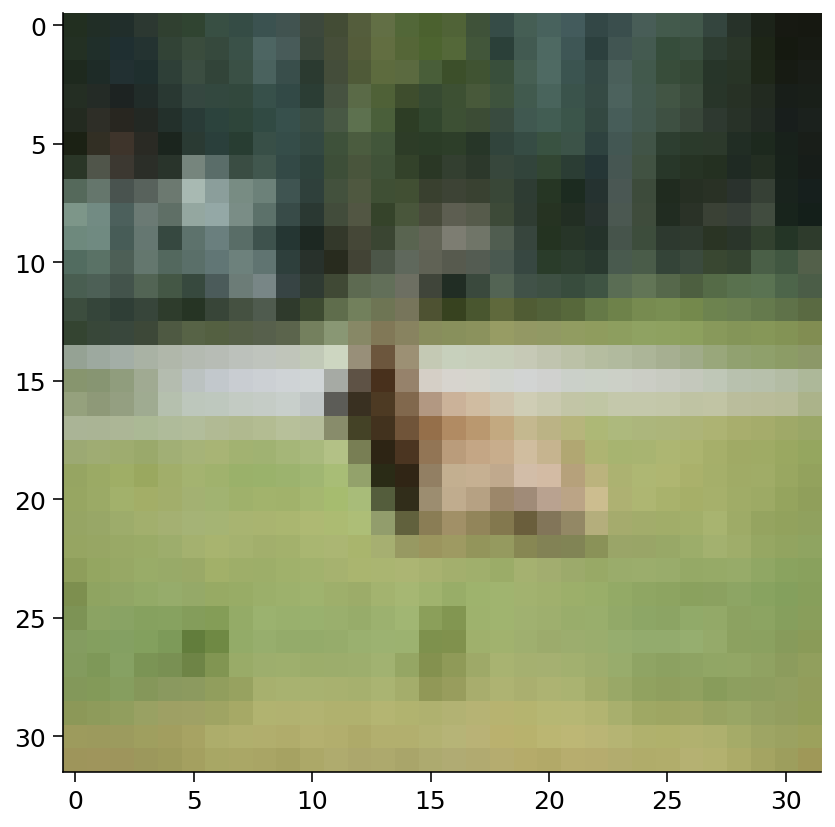

In [ ]:
# TODO: Uncomment the following line to see the error that arises from the current image format
#plt.imshow(image)

# TODO: Comment the above line and fix this code by reordering the tensor dimensions
plt.imshow(image.permute(1, 2, 0))
plt.show()

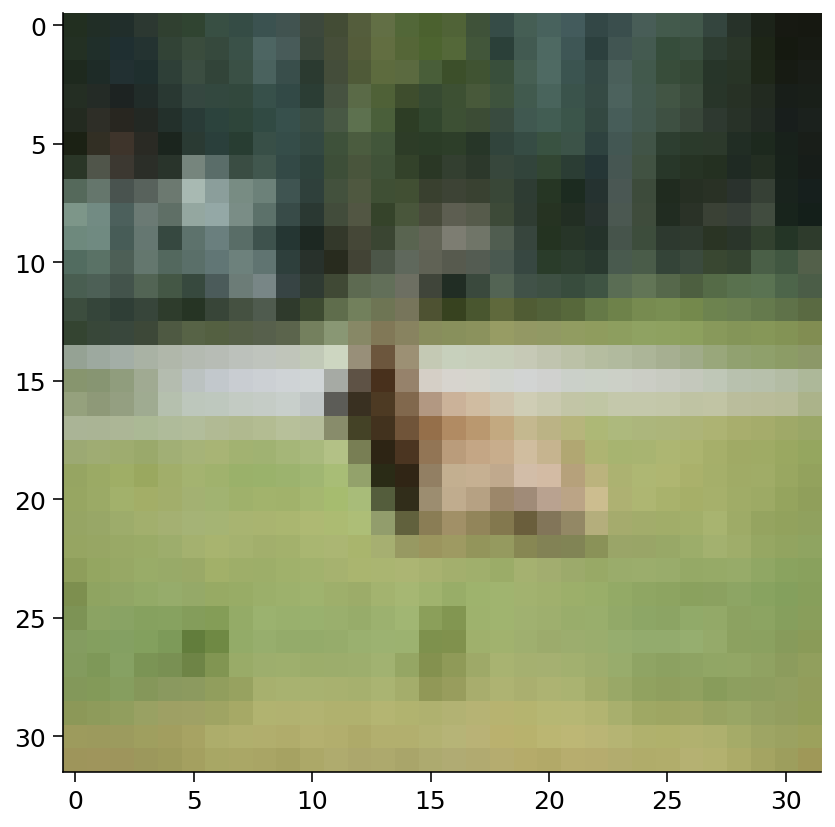

In [ ]:
#@markdown Click for solution
# TODO: Uncomment the following line to see the error that arises from the current image format
#|plt.imshow(image)
plt.imshow(image.permute(1,2,0))
plt.show()

*Example output:*

<img alt='Solution hint' align='left' width=835.0 height=827.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content-dl/main/tutorials/W1D1_BasicsAndPytorch/static/W1D1_Tutorial1_Solution_b04bd357_0.png>



**Training and Test Datasets**

When loading a dataset, you can specify if you want to load the training or the test samples using the `train` argument. We can load the training and test datasets separately. For simplicity, today we will not use both datasets separately, but this topic will be adressed in the next days.

In [ ]:
# Load the training samples
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

# Load the test samples
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
    )

Files already downloaded and verified
Files already downloaded and verified


---
# Appendix

## Official PyTorch resources:

### Tutorials
- [https://pytorch.org/tutorials/](https://pytorch.org/tutorials/)

### Documentation
- [https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html) (tensor methods)

- [https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html#torch.Tensor.view) (The view method in particular)

- [https://pytorch.org/vision/stable/datasets.html](https://pytorch.org/vision/stable/datasets.html) (pre-loaded image datasets)

## Google Colab Resources:
- [https://research.google.com/colaboratory/faq.html](https://research.google.com/colaboratory/faq.html) (FAQ including guidance on GPU usage)

## Books for reference:
- [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/) (Deep Learning by Ian Goodfellow, Yoshua Bengio and Aaron Courville)